In [1]:
import datetime, os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.metrics import Accuracy
import tensorflow as tf


BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 0.13
IMAGE_SIZE = 112

img_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
)


test_ds = img_gen.flow_from_directory('../input/paddy-disease-classification/test_images',
                                      target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                      classes=['.'],
                                      class_mode= None,
                                      batch_size=BATCH_SIZE)

Found 3469 images belonging to 1 classes.


In [8]:
# Load the TFLite model
import time
start_time = time.time()
tflite_model_path = "/kaggle/input/model-tflite/my_model_pd_25_9.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get the input and output details
input_details = interpreter.get_input_details()  # Add this line to get input details
output_details = interpreter.get_output_details()

# Assuming you have a data generator for the test images, similar to test_ds
# Sort the file paths of test images for consistent order
sorted_test_files = sorted(test_ds.filepaths)

# Initialize an empty list to store predictions
predictions = []

# Define the number of images to predict (e.g., 5 or 6)
num_images_to_predict = 500

# Iterate over the sorted test files and make predictions
for image_path in sorted_test_files:
    if num_images_to_predict == 0:
        break  # Stop if we have made predictions for the desired number of images

    image = plt.imread(image_path)  # Load the image

    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))  # Resize the image
    image = np.expand_dims(image, axis=0)  # Add a batch dimension

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], image)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Append the prediction to the list
    predictions.extend(output_data)

    num_images_to_predict -= 1  # Decrease the count of images to predict

# Convert predictions to class labels (No changes here)
predicted_class_indices = np.argmax(predictions, axis=1)
class_mapping = {0: 'bacterial_leaf_blight', 1: 'bacterial_leaf_streak', 2: 'bacterial_panicle_blight', 
                 3: 'blast', 4: 'brown_spot', 5: 'dead_heart', 6: 'downy_mildew', 7: 'hispa', 8: 'normal', 
                 9: 'tungro'}
predicted_labels = [class_mapping[i] for i in predicted_class_indices]

# Create a DataFrame for the predictions (No changes here)
submission = pd.DataFrame({"image_id": sorted_test_files[:len(predicted_labels)], "label": predicted_labels})
submission.head()
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

35.236921072006226


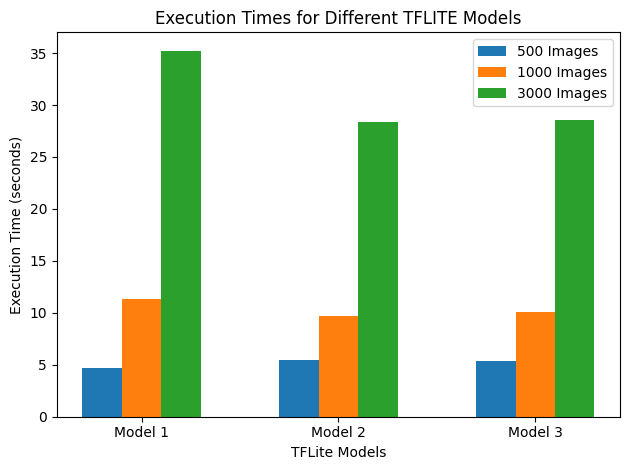

In [12]:
import matplotlib.pyplot as plt

# Replace these with your actual execution times for each program and iteration count
execution_times_5_iterations = [4.713332414627075, 5.418574333190918, 5.405676603317261]
execution_times_10_iterations = [11.348209857940674,9.696650981903076 , 10.04095983505249]  
execution_times_15_iterations = [35.236921072006226, 28.401108264923096, 28.58520531654358]  

# Number of programs
programs = ['Model 1', 'Model 2', 'Model 3']

# X-axis positions for the bars
x = range(len(programs))

# Width of the bars
bar_width = 0.2

# Create the bar graph
plt.bar(x, execution_times_5_iterations, width=bar_width, label='500 Images')
plt.bar([i + bar_width for i in x], execution_times_10_iterations, width=bar_width, label='1000 Images')
plt.bar([i + 2 * bar_width for i in x], execution_times_15_iterations, width=bar_width, label='3000 Images')

# Add labels, title, and legend
plt.xlabel('TFLite Models')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Times for Different TFLITE Models')
plt.xticks([i + bar_width for i in x], programs)
plt.legend()

# Show the bar graph
plt.tight_layout()
plt.show()


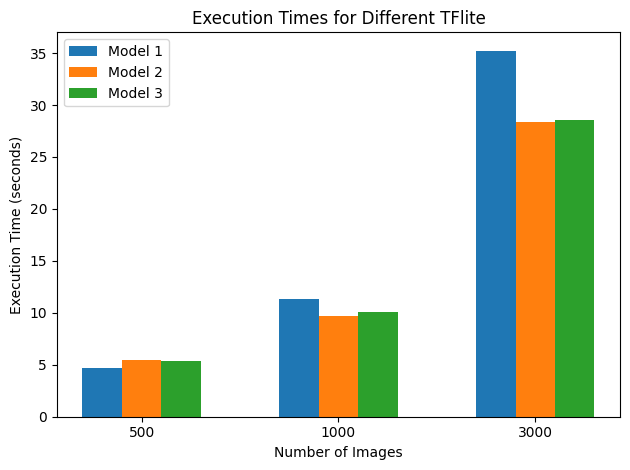

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual execution times for each program and iteration count
# execution_times_program_1 = [4.713332414627075, 5.418574333190918, 5.405676603317261]  # Program 1 execution times
# execution_times_program_2 = [11.348209857940674,9.696650981903076 , 10.04095983505249]   # Program 2 execution times
# execution_times_program_3 = [35.236921072006226, 28.401108264923096, 28.58520531654358]    # Program 3 execution times

execution_times_program_1 = [4.713332414627075,11.348209857940674 ,35.236921072006226]
execution_times_program_2 = [5.418574333190918,9.696650981903076, 28.401108264923096]
execution_times_program_3 = [5.405676603317261,10.04095983505249, 28.58520531654358]

# Number of iterations
iterations = [500, 1000, 3000]

# X-axis positions for the bars
x = np.arange(len(iterations))

# Width of the bars
bar_width = 0.2

# Create the bar graph
plt.bar(x - bar_width, execution_times_program_1, width=bar_width, label='Model 1')
plt.bar(x, execution_times_program_2, width=bar_width, label='Model 2')
plt.bar(x + bar_width, execution_times_program_3, width=bar_width, label='Model 3')

# Add labels, title, and legend
plt.xlabel('Number of Images')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Times for Different TFlite')
plt.xticks(x, iterations)
plt.legend()

# Show the bar graph
plt.tight_layout()
plt.show()


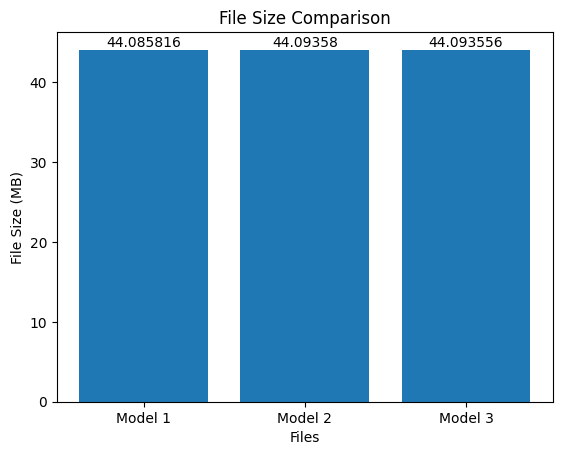

In [5]:
import os
import matplotlib.pyplot as plt

# Define the paths to the downloaded files
file1_path = "/kaggle/input/model-tflite/my_model_pd_25_9.tflite"
file2_path = "/kaggle/input/model-tflite-2/trial_4_colab_model.tflite"
file3_path = "/kaggle/input/my-model-3/model_3_5_10.tflite"

# Get the sizes of the files in bytes
file1_size = os.path.getsize(file1_path)
file2_size = os.path.getsize(file2_path)
file3_size = os.path.getsize(file3_path)

# Create a bar graph to compare file sizes
file_names = ["Model 1", "Model 2", "Model 3"]
file_sizes = [file1_size, file2_size, file3_size]
file_sizes = [i/1000000 for i in file_sizes]

plt.bar(file_names, file_sizes)
plt.xlabel("Files")
plt.ylabel("File Size (MB)")
plt.title("File Size Comparison")

for i, size in enumerate(file_sizes):
    plt.text(i, size, str(size), ha="center", va="bottom")

# Show the bar graph
plt.show()
